<a href="https://colab.research.google.com/github/HelloMrAman/my_repo/blob/main/personal_finances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== FINANCIAL SUMMARY ===
Period: January 2021 to December 2021

Total Income: ₹698,147.00
Total Expenses: ₹149,853.28
Net Savings: ₹548,293.72
Savings Rate: 78.5%

=== MONTHLY AVERAGES ===
Average Monthly Income: ₹58,178.92
Average Monthly Expenses: ₹12,487.77
Average Monthly Savings: ₹45,691.14

=== CATEGORY ANALYSIS ===
                Total Spent  Number of Transactions  Monthly Average
Category                                                            
Household          54810.00                      12          4567.50
Other              28887.00                      21          2407.25
Food               24607.76                     114          2050.65
Transportation     15873.80                      26          1322.82
Education          14000.00                       1          1166.67
Apparel            11674.72                       8           972.89

=== GENERATING VISUALIZATIONS ===


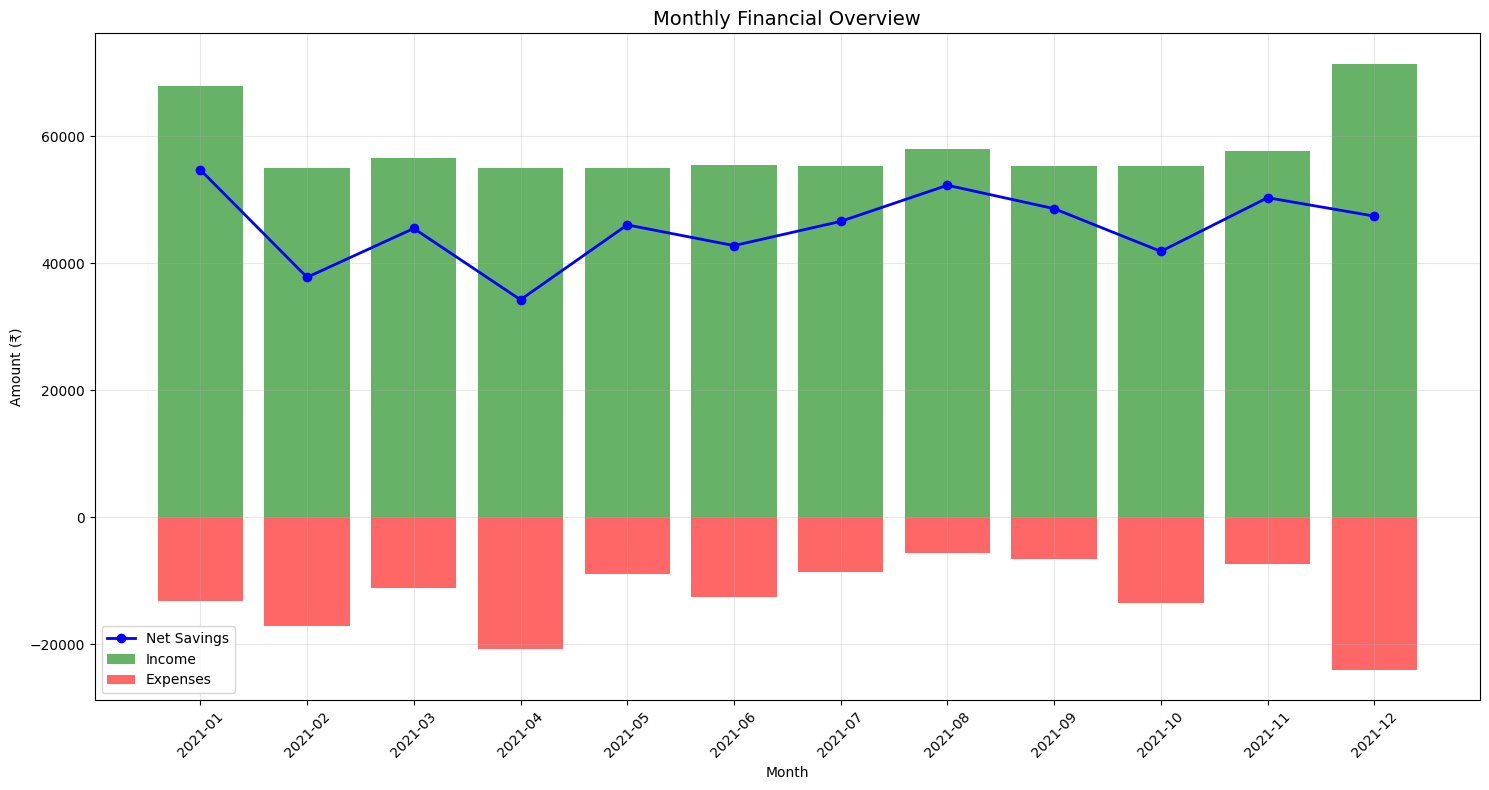

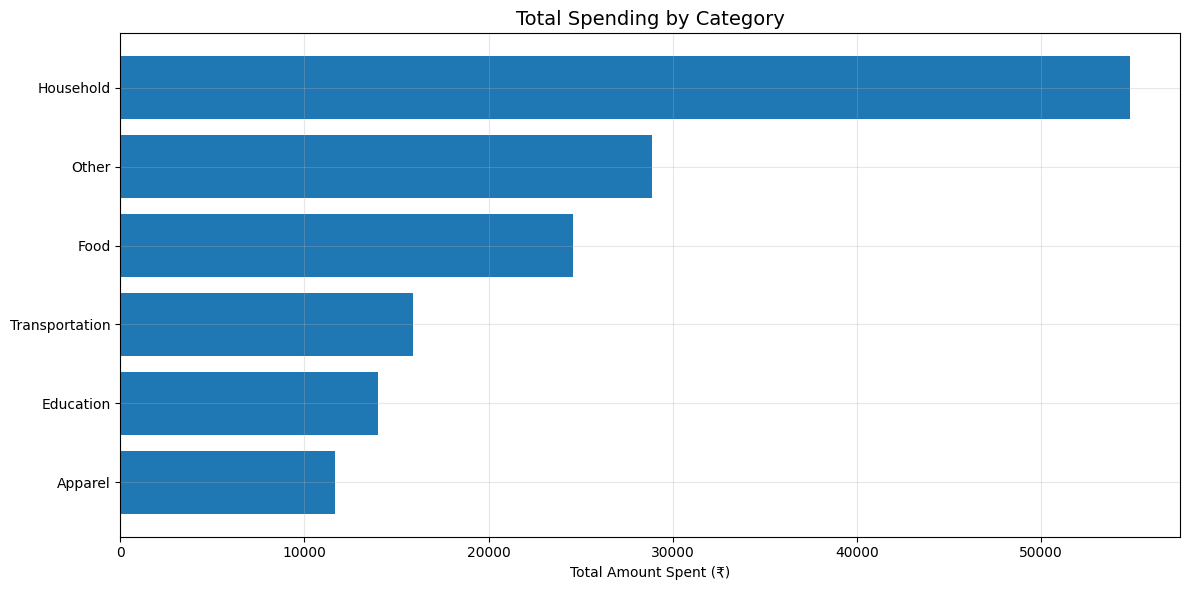

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def load_and_preprocess_data(file_path):
    """Load and preprocess the financial data."""
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Clean column names and strip any whitespace
    data.columns = data.columns.str.strip()

    # Convert date to datetime format
    try:
        data['Date'] = pd.to_datetime(data['Date / Time'].str.strip(), format='%A, %B %d, %Y')
    except KeyError:
        print("Error: 'Date / Time' column not found.")
        return None

    # Create month, year, and MonthYear columns for easier analysis
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    data['MonthYear'] = data['Date'].dt.to_period('M')

    # Convert Debit/Credit column to numeric and handle Income/Expense designation
    try:
        data['Amount'] = pd.to_numeric(data['Debit/Credit'], errors='coerce')
        data.loc[data['Income/Expense'] == 'Expense', 'Amount'] *= -1
    except KeyError:
        print("Error: 'Debit/Credit' or 'Income/Expense' column not found.")
        return None

    return data.dropna(subset=['Amount'])

def analyze_monthly_trends(data):
    """Analyze monthly income, expenses, and savings."""
    monthly_data = data.groupby('MonthYear').agg({
        'Amount': lambda x: (x[x > 0].sum(), x[x < 0].sum(), x.sum())
    }).reset_index()

    monthly_data[['Income', 'Expenses', 'Net']] = pd.DataFrame(monthly_data['Amount'].tolist())
    monthly_data = monthly_data.drop('Amount', axis=1)

    return monthly_data

def plot_monthly_trends(monthly_data):
    """Create visualization for monthly trends."""
    plt.figure(figsize=(15, 8))

    # Plot bars for income and expenses
    plt.bar(range(len(monthly_data)), monthly_data['Income'], label='Income', color='green', alpha=0.6)
    plt.bar(range(len(monthly_data)), monthly_data['Expenses'], label='Expenses', color='red', alpha=0.6)

    # Plot net savings line
    plt.plot(range(len(monthly_data)), monthly_data['Net'], label='Net Savings', color='blue', linewidth=2, marker='o')

    plt.title('Monthly Financial Overview', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Amount (₹)')
    plt.xticks(range(len(monthly_data)), [str(date) for date in monthly_data['MonthYear']], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_category_spending(data):
    """Analyze spending patterns by category."""
    try:
        category_analysis = data[data['Amount'] < 0].groupby('Category').agg({
            'Amount': ['sum', 'count', lambda x: x.sum() / len(data['Month'].unique())]
        }).round(2)

        category_analysis.columns = ['Total Spent', 'Number of Transactions', 'Monthly Average']
        category_analysis['Total Spent'] = abs(category_analysis['Total Spent'])
        category_analysis['Monthly Average'] = abs(category_analysis['Monthly Average'])
        category_analysis = category_analysis.sort_values('Total Spent', ascending=False)
    except KeyError:
        print("Error: 'Category' column not found.")
        return None

    return category_analysis

def plot_category_distribution(data):
    """Create visualization for category-wise spending."""
    plt.figure(figsize=(12, 6))

    try:
        category_totals = abs(data[data['Amount'] < 0].groupby('Category')['Amount'].sum())
        category_totals = category_totals.sort_values(ascending=True)

        plt.barh(range(len(category_totals)), category_totals.values)
        plt.yticks(range(len(category_totals)), category_totals.index)
        plt.title('Total Spending by Category', fontsize=14)
        plt.xlabel('Total Amount Spent (₹)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    except KeyError:
        print("Error: 'Category' column not found.")

def calculate_financial_metrics(data):
    """Calculate key financial metrics."""
    total_income = data[data['Amount'] > 0]['Amount'].sum()
    total_expenses = abs(data[data['Amount'] < 0]['Amount'].sum())
    net_savings = total_income - total_expenses
    savings_rate = (net_savings / total_income * 100) if total_income > 0 else 0

    # Calculate monthly averages
    num_months = len(data['MonthYear'].unique())
    avg_monthly_income = total_income / num_months
    avg_monthly_expenses = total_expenses / num_months
    avg_monthly_savings = net_savings / num_months

    metrics = {
        'Total Income': total_income,
        'Total Expenses': total_expenses,
        'Net Savings': net_savings,
        'Savings Rate': savings_rate,
        'Average Monthly Income': avg_monthly_income,
        'Average Monthly Expenses': avg_monthly_expenses,
        'Average Monthly Savings': avg_monthly_savings,
        'Number of Months': num_months
    }

    return metrics

def generate_financial_report(file_path):
    """Generate comprehensive financial report."""
    # Load and preprocess data
    data = load_and_preprocess_data(file_path)
    if data is None:
        print("Error loading data. Check file and column names.")
        return None

    # Calculate financial metrics
    metrics = calculate_financial_metrics(data)

    # Print financial summary
    print("\n=== FINANCIAL SUMMARY ===")
    print(f"Period: {data['Date'].min().strftime('%B %Y')} to {data['Date'].max().strftime('%B %Y')}")
    print(f"\nTotal Income: ₹{metrics['Total Income']:,.2f}")
    print(f"Total Expenses: ₹{metrics['Total Expenses']:,.2f}")
    print(f"Net Savings: ₹{metrics['Net Savings']:,.2f}")
    print(f"Savings Rate: {metrics['Savings Rate']:.1f}%")

    print("\n=== MONTHLY AVERAGES ===")
    print(f"Average Monthly Income: ₹{metrics['Average Monthly Income']:,.2f}")
    print(f"Average Monthly Expenses: ₹{metrics['Average Monthly Expenses']:,.2f}")
    print(f"Average Monthly Savings: ₹{metrics['Average Monthly Savings']:,.2f}")

    # Analyze and display category spending
    category_analysis = analyze_category_spending(data)
    if category_analysis is not None:
        print("\n=== CATEGORY ANALYSIS ===")
        print(category_analysis)

    # Generate visualizations
    print("\n=== GENERATING VISUALIZATIONS ===")
    monthly_data = analyze_monthly_trends(data)
    plot_monthly_trends(monthly_data)
    plot_category_distribution(data)

    return data, metrics, category_analysis

# Execute the analysis
if __name__ == "__main__":
    file_path = "/content/sample_data/finance_data.csv"  # Path to uploaded CSV file
    data, metrics, category_analysis = generate_financial_report(file_path)
